# Linear Regression From Scratch

## Mathematical Foundation

Linear regression models the relationship between features **X** and target **y** as:

$$\hat{y} = \mathbf{X}\mathbf{w} + b$$

where:
- $\mathbf{w}$ is the weight vector (learned parameters)
- $b$ is the bias term
- $\hat{y}$ are the predictions

### Loss Function: Mean Squared Error

$$L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{n}||\mathbf{y} - \hat{\mathbf{y}}||^2$$

With L2 regularization (Ridge regression):

$$L = \frac{1}{n}||\mathbf{y} - \hat{\mathbf{y}}||^2 + \frac{\lambda}{2}||\mathbf{w}||^2$$

### Gradient Descent

We minimize the loss by iteratively updating parameters:

$$\mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{\partial L}{\partial \mathbf{w}}$$

$$b \leftarrow b - \alpha \frac{\partial L}{\partial b}$$

where $\alpha$ is the learning rate.

### Gradients

$$\frac{\partial L}{\partial \mathbf{w}} = -\frac{2}{n}\mathbf{X}^T(\mathbf{y} - \hat{\mathbf{y}}) + \lambda\mathbf{w}$$

$$\frac{\partial L}{\partial b} = -\frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)$$


In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from linear_regression import LinearRegression

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')


In [2]:
# Load preprocessed data
with open('../data_preprocessed.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (16512, 8)
Test set: (4128, 8)


## Feature Scaling

Gradient descent converges faster when features are on similar scales. We'll standardize features to have zero mean and unit variance.


In [3]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature statistics after scaling:")
print(f"Mean: {X_train_scaled.mean(axis=0)}")
print(f"Std: {X_train_scaled.std(axis=0)}")


Feature statistics after scaling:
Mean: [-6.59266865e-15 -6.68608149e-17  8.01559239e-15 -1.17273358e-15
 -2.60880895e-18 -1.13675656e-16  7.99652724e-14 -3.87910056e-13]
Std: [1. 1. 1. 1. 1. 1. 1. 1.]


## Training Linear Regression Model

Let's train our from-scratch implementation with different hyperparameters to observe convergence behavior.


In [4]:
# Train model without regularization
model_no_reg = LinearRegression(
    learning_rate=0.01,
    max_iterations=2000,
    regularization=0.0,
    verbose=True
)

model_no_reg.fit(X_train_scaled, y_train)

print(f"\nFinal training loss: {model_no_reg.loss_history[-1]:.6f}")
print(f"Number of iterations: {len(model_no_reg.loss_history)}")


Iteration 100/2000, Loss: 0.715652
Iteration 200/2000, Loss: 0.596631
Iteration 300/2000, Loss: 0.574193
Iteration 400/2000, Loss: 0.559154
Iteration 500/2000, Loss: 0.548240
Iteration 600/2000, Loss: 0.540282
Iteration 700/2000, Loss: 0.534466
Iteration 800/2000, Loss: 0.530207
Iteration 900/2000, Loss: 0.527079
Iteration 1000/2000, Loss: 0.524776
Iteration 1100/2000, Loss: 0.523074
Iteration 1200/2000, Loss: 0.521813
Iteration 1300/2000, Loss: 0.520875
Iteration 1400/2000, Loss: 0.520175
Iteration 1500/2000, Loss: 0.519650
Iteration 1600/2000, Loss: 0.519254
Iteration 1700/2000, Loss: 0.518955
Iteration 1800/2000, Loss: 0.518727
Iteration 1900/2000, Loss: 0.518554
Iteration 2000/2000, Loss: 0.518420

Final training loss: 0.518420
Number of iterations: 2000


In [5]:
# Train model with L2 regularization
model_with_reg = LinearRegression(
    learning_rate=0.01,
    max_iterations=2000,
    regularization=0.1,  # L2 regularization strength
    verbose=True
)

model_with_reg.fit(X_train_scaled, y_train)

print(f"\nFinal training loss: {model_with_reg.loss_history[-1]:.6f}")
print(f"Number of iterations: {len(model_with_reg.loss_history)}")


Iteration 100/2000, Loss: 0.744886
Iteration 200/2000, Loss: 0.636969
Iteration 300/2000, Loss: 0.623189
Iteration 400/2000, Loss: 0.615938
Iteration 500/2000, Loss: 0.611647
Iteration 600/2000, Loss: 0.609091
Iteration 700/2000, Loss: 0.607565
Iteration 800/2000, Loss: 0.606653
Iteration 900/2000, Loss: 0.606106
Iteration 1000/2000, Loss: 0.605778
Iteration 1100/2000, Loss: 0.605580
Converged at iteration 1184

Final training loss: 0.605474
Number of iterations: 1185


## Visualizing Training Convergence


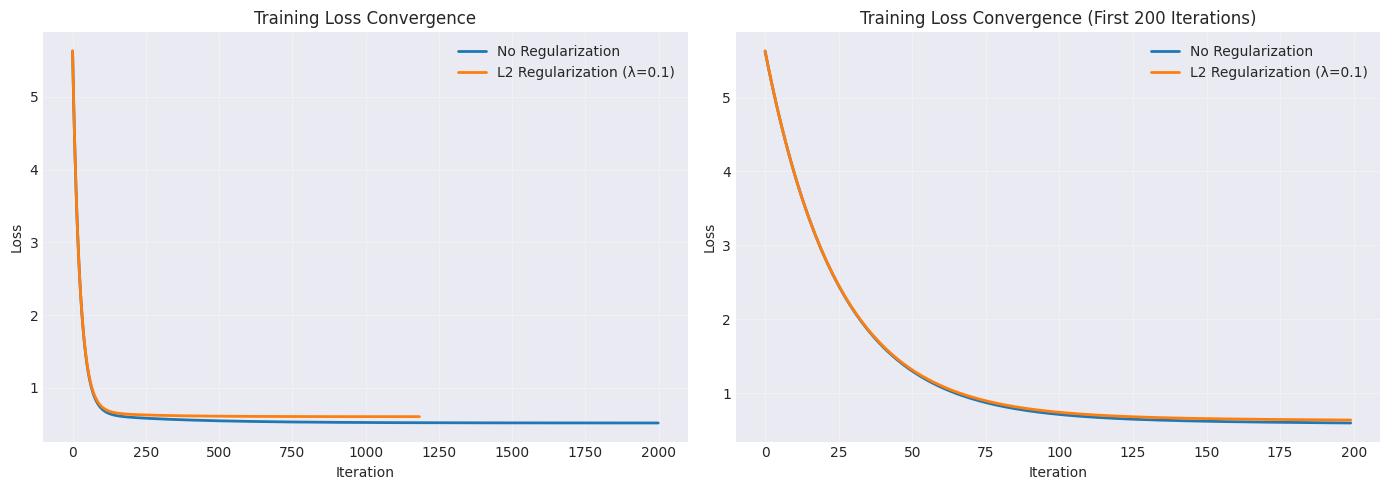

In [6]:
# Plot loss convergence
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Full convergence
axes[0].plot(model_no_reg.loss_history, label='No Regularization', linewidth=2)
axes[0].plot(model_with_reg.loss_history, label='L2 Regularization (λ=0.1)', linewidth=2)
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss Convergence')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# First 200 iterations (zoomed in)
axes[1].plot(model_no_reg.loss_history[:200], label='No Regularization', linewidth=2)
axes[1].plot(model_with_reg.loss_history[:200], label='L2 Regularization (λ=0.1)', linewidth=2)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training Loss Convergence (First 200 Iterations)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Model Evaluation


In [7]:
# Make predictions
y_pred_no_reg = model_no_reg.predict(X_test_scaled)
y_pred_with_reg = model_with_reg.predict(X_test_scaled)

# Calculate metrics
mse_no_reg = mean_squared_error(y_test, y_pred_no_reg)
mse_with_reg = mean_squared_error(y_test, y_pred_with_reg)

r2_no_reg = model_no_reg.score(X_test_scaled, y_test)
r2_with_reg = model_with_reg.score(X_test_scaled, y_test)

print("Model Performance:")
print("=" * 50)
print(f"No Regularization:")
print(f"  MSE: {mse_no_reg:.6f}")
print(f"  RMSE: {np.sqrt(mse_no_reg):.6f}")
print(f"  R² Score: {r2_no_reg:.6f}")
print(f"\nWith L2 Regularization (λ=0.1):")
print(f"  MSE: {mse_with_reg:.6f}")
print(f"  RMSE: {np.sqrt(mse_with_reg):.6f}")
print(f"  R² Score: {r2_with_reg:.6f}")


Model Performance:
No Regularization:
  MSE: 0.555864
  RMSE: 0.745563
  R² Score: 0.575809

With L2 Regularization (λ=0.1):
  MSE: 0.564162
  RMSE: 0.751107
  R² Score: 0.569476


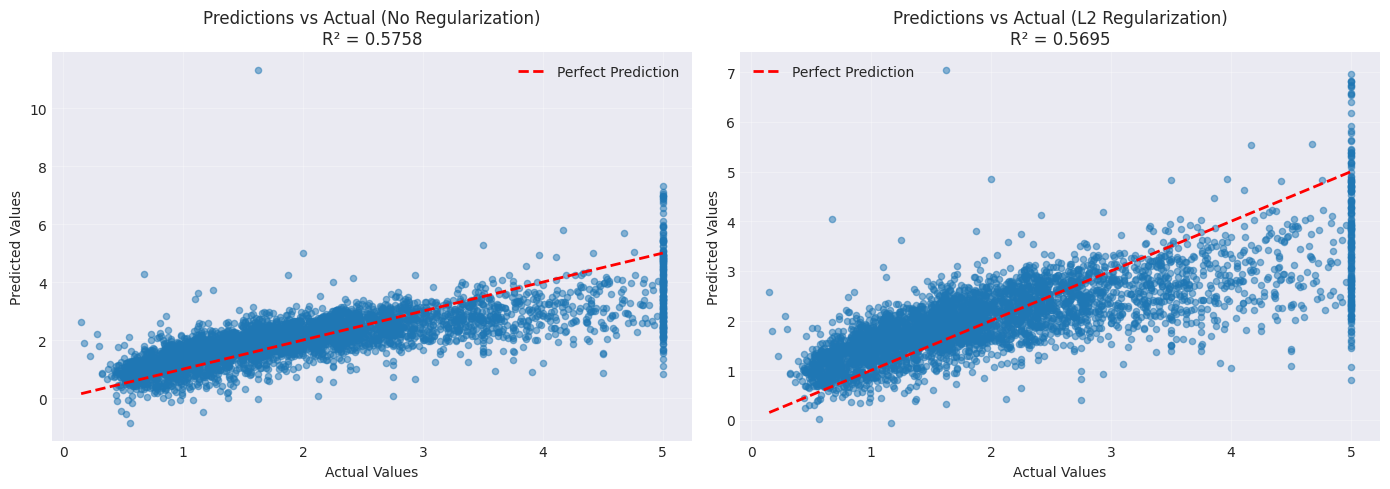

In [8]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# No regularization
axes[0].scatter(y_test, y_pred_no_reg, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Predictions vs Actual (No Regularization)\nR² = {r2_no_reg:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# With regularization
axes[1].scatter(y_test, y_pred_with_reg, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Predictions vs Actual (L2 Regularization)\nR² = {r2_with_reg:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Learning Rate Experiment

Let's observe how different learning rates affect convergence.


In [9]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
models_lr = {}

for lr in learning_rates:
    model = LinearRegression(
        learning_rate=lr,
        max_iterations=1000,
        regularization=0.0,
        verbose=False
    )
    model.fit(X_train_scaled, y_train)
    models_lr[lr] = model
    print(f"LR={lr}: Final loss = {model.loss_history[-1]:.6f}, Iterations = {len(model.loss_history)}")


LR=0.001: Final loss = 0.713382, Iterations = 1000
LR=0.01: Final loss = 0.524693, Iterations = 1000
LR=0.1: Final loss = 0.517980, Iterations = 301
LR=0.5: Final loss = 9845242757134510080.000000, Iterations = 1000


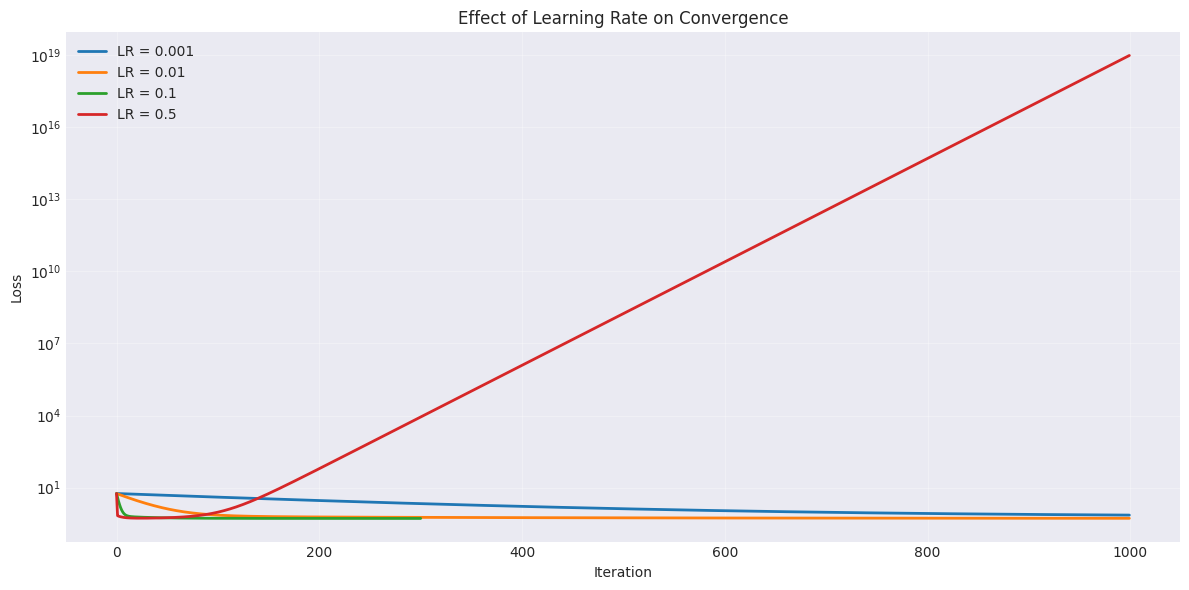

In [10]:
# Plot convergence for different learning rates
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    plt.plot(models_lr[lr].loss_history, label=f'LR = {lr}', linewidth=2)

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()


## Key Observations

1. **Convergence**: Gradient descent successfully minimizes the loss function
2. **Regularization**: L2 regularization can help prevent overfitting (though effect may be subtle on this dataset)
3. **Learning Rate**: Too small → slow convergence, too large → instability/divergence
4. **Vectorization**: NumPy operations enable efficient computation on large datasets

The implementation demonstrates core ML principles: optimization, regularization, and hyperparameter sensitivity.
